# Notebook de análise exploratória dos dados (EDA)

## Importação das bibliotecas

In [30]:
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [31]:
# Configurar paleta de cores e estilo

# Matplotlib
mpl.rcParams["figure.figsize"] = (20, 7)
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["font.size"] = 12
mpl.rcParams["figure.titlesize"] = 25
mpl.rcParams["figure.dpi"] = 100

# Seaborn
sns.set_style('whitegrid', {"grid.color": ".8", "grid.linestyle": "--"})
sns.set_palette(palette='mako')

## Aquisição dos dados

In [32]:
input_path = '../data/processed/dados_historicos_ibovespa_2015-2025_processed.csv'

df = pd.read_csv(input_path, index_col='ds', parse_dates=['ds'])
df.tail()

,target,close,open,high,low,volume,daily_return,return_lag_1,return_lag_2,return_lag_3,...,momentum_21,momentum_63,sma_21,ema_50,rsi_14,atr_14,obv,day_of_week,day_of_month,month
ds,,,,,,,,,,,,,,,,,,,,,
2025-06-12,0,137800,137127,137931,136175,7.120000e+09,0.0049,0.0051,0.0054,-0.0030,...,-0.004501,0.112510,137814.619048,134894.977670,56.429439,1746.368879,1.365131e+11,3,12,6
2025-06-13,1,137213,137800,137800,136586,8.630000e+09,-0.0043,0.0049,0.0051,0.0054,...,-0.015222,0.092138,137713.619048,134985.880507,53.149650,1708.342531,1.278831e+11,4,13,6
2025-06-16,0,139256,137212,139988,137212,7.620000e+09,0.0149,-0.0043,0.0049,0.0051,...,0.000496,0.079864,137716.904762,135153.336173,61.530240,1784.603778,1.355031e+11,0,16,6
2025-06-17,0,138840,139256,139497,138293,8.380000e+09,-0.0030,0.0149,-0.0043,0.0049,...,-0.005701,0.061192,137679.000000,135297.911225,59.207770,1743.132080,1.271231e+11,1,17,6
2025-06-18,0,138717,138844,139161,138443,8.320000e+09,-0.0009,-0.0030,0.0149,-0.0043,...,-0.009942,0.055083,137612.666667,135431.993138,58.504620,1669.908360,1.188031e+11,2,18,6


In [33]:
# informações gerais do dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2482 entries, 2015-06-17 to 2025-06-18
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        2482 non-null   int64  
 1   close         2482 non-null   int64  
 2   open          2482 non-null   int64  
 3   high          2482 non-null   int64  
 4   low           2482 non-null   int64  
 5   volume        2482 non-null   float64
 6   daily_return  2482 non-null   float64
 7   return_lag_1  2482 non-null   float64
 8   return_lag_2  2482 non-null   float64
 9   return_lag_3  2482 non-null   float64
 10  return_lag_4  2482 non-null   float64
 11  return_lag_5  2482 non-null   float64
 12  momentum_5    2482 non-null   float64
 13  momentum_21   2482 non-null   float64
 14  momentum_63   2482 non-null   float64
 15  sma_21        2482 non-null   float64
 16  ema_50        2482 non-null   float64
 17  rsi_14        2482 non-null   float64
 18  atr_14    

## Análise exploratória

In [34]:
# resumo estatístico básico
df.describe()

,target,close,open,high,low,volume,daily_return,return_lag_1,return_lag_2,return_lag_3,...,momentum_21,momentum_63,sma_21,ema_50,rsi_14,atr_14,obv,day_of_week,day_of_month,month
count,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03,2482.000000,2482.000000,2482.000000,2482.000000,...,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2482.000000,2.482000e+03,2482.000000,2482.000000,2482.000000
mean,0.522965,95761.666801,95728.100725,96579.991942,94908.077760,4.883084e+08,0.000496,0.000501,0.000500,0.000492,...,0.010372,0.030227,95422.952247,94957.322060,52.841734,1669.564195,3.614412e+09,1.999194,15.776793,6.497180
std,0.499573,26696.892083,26696.097392,26794.265729,26591.710939,2.275271e+09,0.014992,0.014993,0.014993,0.014991,...,0.067764,0.116195,26582.900989,26294.429239,12.039613,664.653090,1.905250e+10,1.409074,8.743843,3.412078
min,0.000000,37497.000000,37501.000000,38031.000000,37046.000000,4.243200e+05,-0.147800,-0.147800,-0.147800,-0.147800,...,-0.454419,-0.435515,39071.190476,41523.235486,19.502335,682.015554,-8.576941e+09,0.000000,1.000000,1.000000
25%,0.000000,74319.000000,74313.000000,75035.000000,73268.000000,3.930000e+06,-0.007200,-0.007200,-0.007200,-0.007200,...,-0.026890,-0.036742,74097.547619,73871.449137,44.093116,1293.277918,2.160372e+08,1.000000,8.000000,4.000000
50%,1.000000,102466.500000,102403.500000,103607.500000,101547.000000,7.620000e+06,0.000700,0.000700,0.000700,0.000700,...,0.008864,0.029747,102516.690476,102271.560339,52.472945,1576.162737,3.951091e+08,2.000000,16.000000,7.000000
75%,1.000000,117414.500000,117370.000000,118287.500000,116263.750000,1.120000e+07,0.008400,0.008400,0.008400,0.008400,...,0.051538,0.103290,116691.488095,115525.736813,61.554550,1907.267469,6.956166e+08,3.000000,23.000000,9.000000
max,1.000000,140110.000000,140109.000000,140382.000000,138966.000000,2.487000e+10,0.139100,0.139100,0.139100,0.139100,...,0.271764,0.484615,137982.619048,135431.993138,84.282462,6755.132249,1.820931e+11,4.000000,31.000000,12.000000


In [35]:
# Gráfico de candlestick com abertura, fechamento, máxima e mínima
fig = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['open'],
    high=df['high'],
    low=df['low'],
    close=df['close'],
    name='OHLC',
    hovertext=[
        f"<b>Data</b>: {d.strftime('%d/%m/%Y')}<br>"
        f"<b>Abertura</b>: {o:.0f}<br>"
        f"<b>Máxima</b>: {h:.0f}<br>"
        f"<b>Mínima</b>: {l:.0f}<br>"
        f"<b>Fechamento</b>: {c:.0f}"
        for d, o, h, l, c in zip(df.index, df['open'], df['high'], df['low'], df['close'])
    ],
    hoverinfo='text'
)])

# Gráfico para a média móvel simples
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['sma_21'],
    marker_color='blue',
    opacity=0.5,
    name='MMS (21d)'
))

# Título e rótulos dos eixos
fig.update_layout(
    title=dict(text='Análise histórica do índice IBOVESPA' + '<br><sup>dos últimos 10 anos</sup>', x=0.5, font_size=20),
    xaxis=dict(title='Data'),                                                  
    yaxis=dict(title='Preço OHLC (R$)'),
    template='plotly_white',
    height=700
)

# Atualizar eixo X de 1 em 1 ano
fig.update_xaxes(
    dtick="M12",
    tickformat="%Y",
    rangeslider_visible=False
)

fig.show()

In [36]:
# Criar subplot na figura
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, vertical_spacing=0.1)

# Gráfico de preço de fechamento
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['close'],
    mode='lines',
    name='Preço de fechamento',
    line=dict(color='blue'),
    showlegend=False
), row=1, col=1)

# Gráfico de IFR
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['rsi_14'],
    mode='lines',
    name='IFR',
    line=dict(color='orange'),
    showlegend=False
), row=2, col=1)

# Linhas horizontais para o IFR
fig.add_hline(y=70, line_dash='dash', line_color='red', annotation_text='Sobrecompra (70)', row=2, col=1)
fig.add_hline(y=30, line_dash='dash', line_color='green', annotation_text='Sobrevenda (30)', row=2, col=1)

# Título e rótulo dos eixos
fig.update_layout(
    title=dict(text='Preço de fechamento e IFR do IBOVESPA', x=0.5, font_size=20),
    xaxis2=dict(title='Data'),
    yaxis=dict(title='Preço de fechamento (R$)'),
    yaxis2=dict(range=[0,100], autorange=False, title='Índice de força relativa'),
    template='plotly_white',
    height=700
)

# Atualizar eixo X de 1 em 1 ano
fig.update_xaxes(
    dtick='M12',
    tickformat='%Y'
)

fig.show()

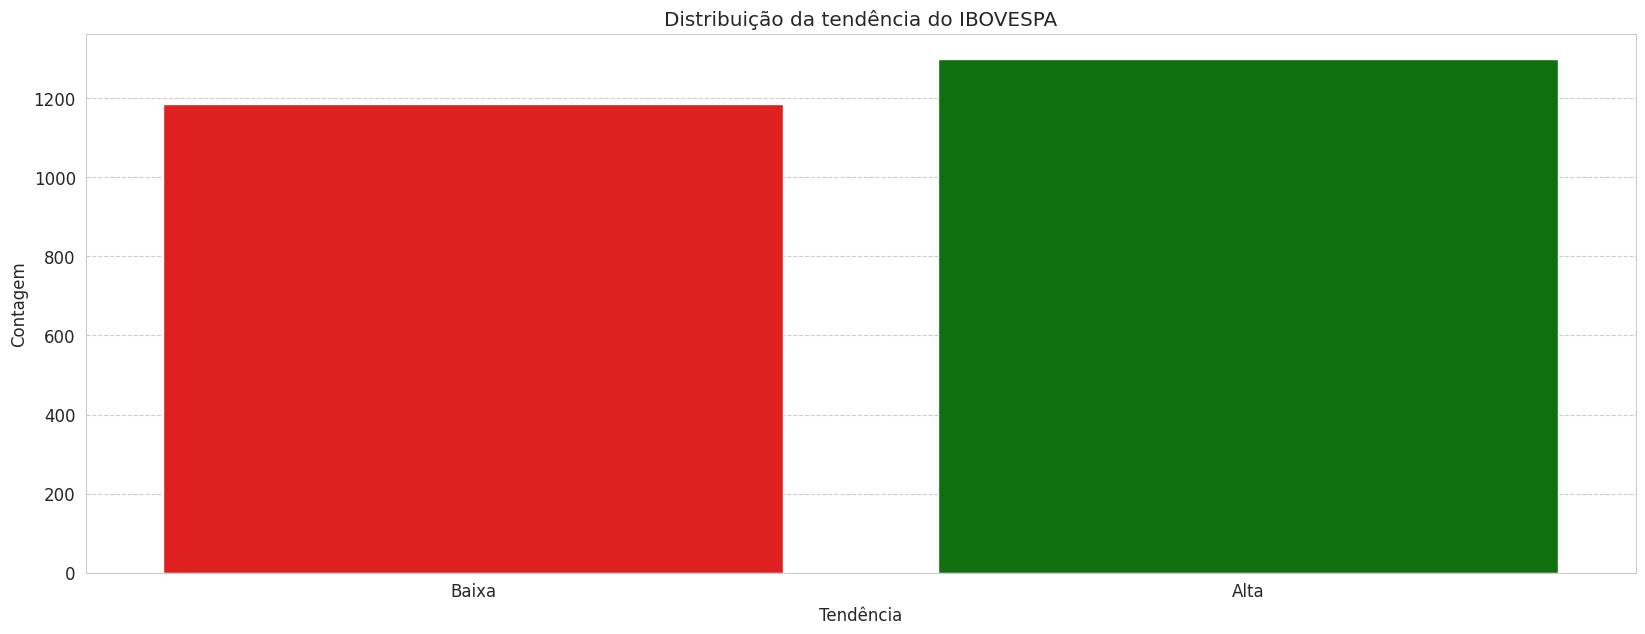

In [37]:
# Paleta
palette_green_red = {0: 'red', 1: 'green'}

# Gráfico de qtd de dias com tendência alta ou baixa
sns.countplot(data=df, x='target', hue='target', palette=palette_green_red, legend=False)

# Título e rótulos dos eixos
plt.title('Distribuição da tendência do IBOVESPA')
plt.xlabel('Tendência')
plt.ylabel('Contagem')
plt.xticks(ticks=[0, 1], labels=['Baixa', 'Alta'])

plt.show()

In [38]:
# Porcentagem da distribuição da tendência
df['target'].value_counts(normalize=True)

target
1    0.522965
0    0.477035
Name: proportion, dtype: float64

Após a análise da distribuição da variável alvo, verificamos que o dataset é naturalmente balanceado. Portanto, a aplicação de técnicas de reamostragem como *oversampling* ou *undersampling* não se faz necessária.

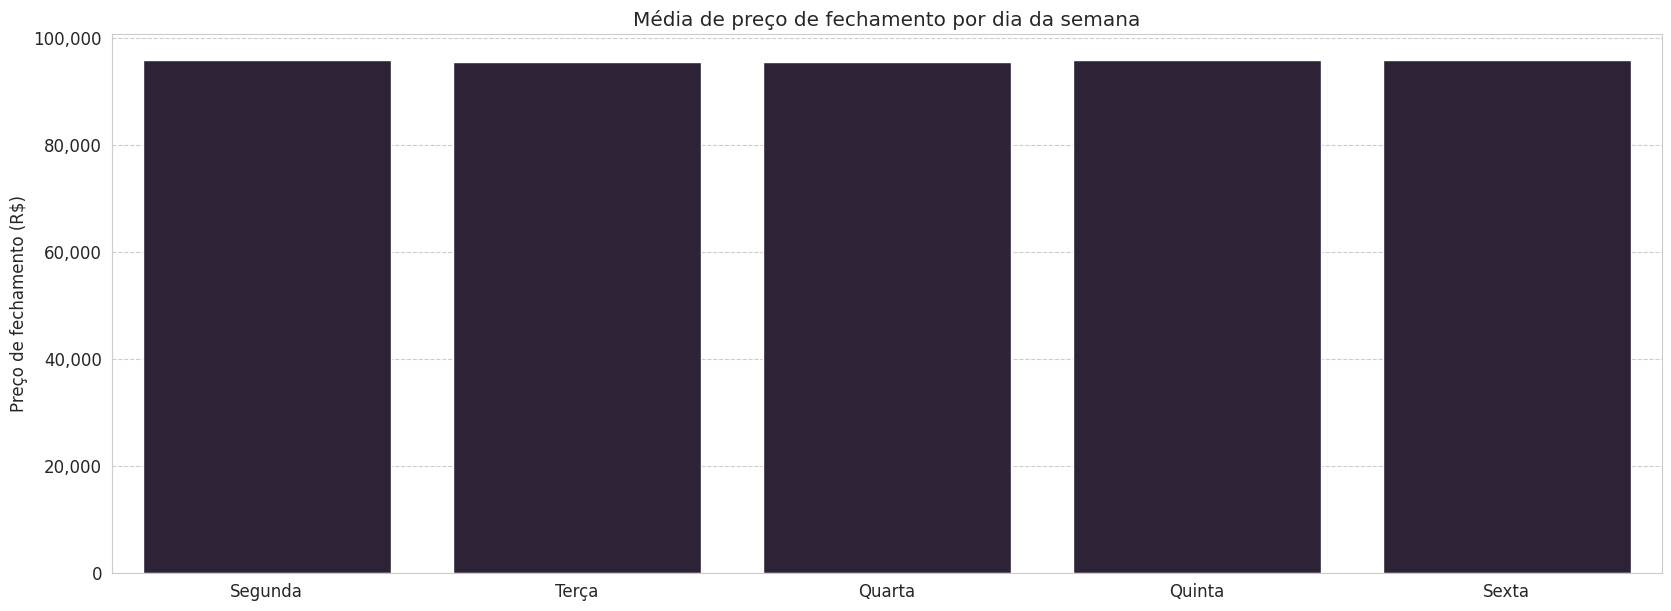

In [39]:
df_week = df.groupby('day_of_week')['close'].mean().reset_index()

# Gráfico de barra de agrupamento por dia da semana
ax = sns.barplot(df_week, x='day_of_week', y='close')

# Título e rótulo dos eixos
plt.title('Média de preço de fechamento por dia da semana')
plt.ylabel('Preço de fechamento (R$)')
plt.xlabel('')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta'])

plt.show()


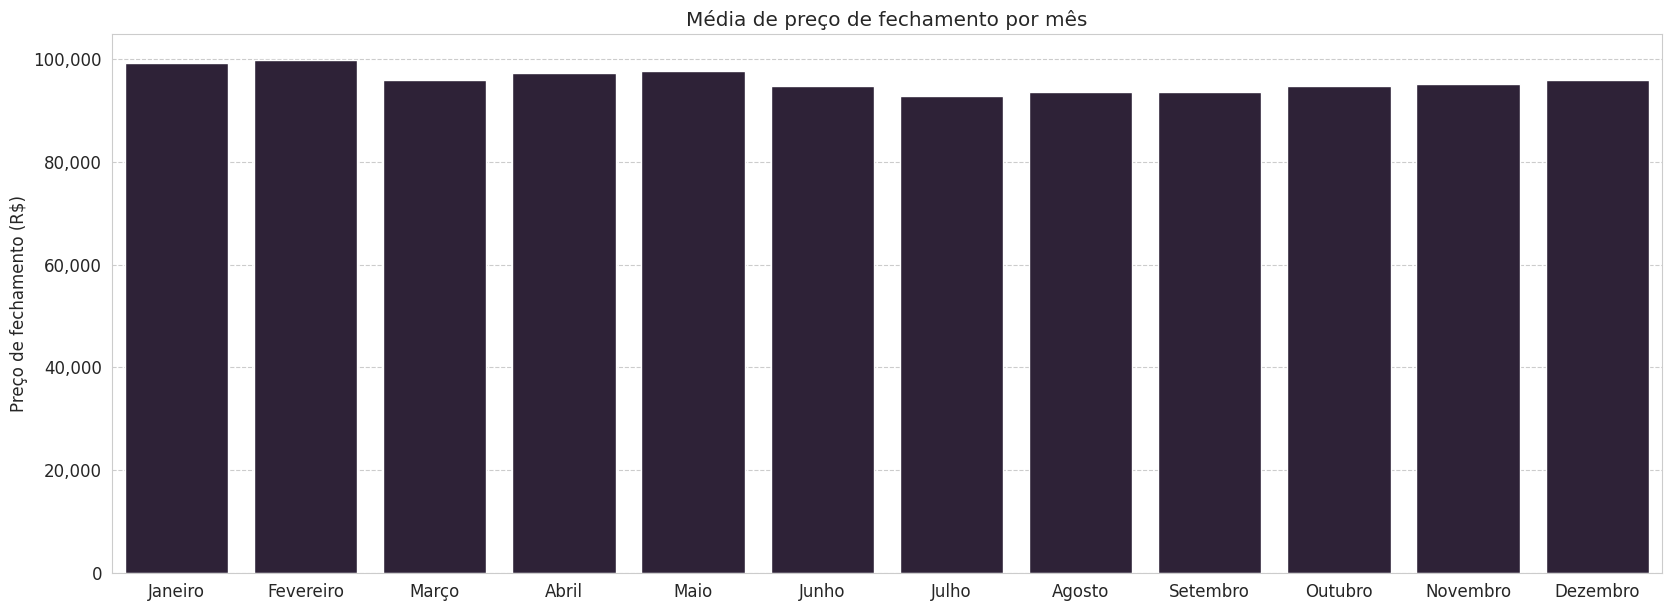

In [40]:
df_month = df.groupby('month')['close'].mean().reset_index()

# Gráfico de barra de agrupamento por dia da semana
ax = sns.barplot(df_month, x='month', y='close')

# Título e rótulo dos eixos
plt.title('Média de preço de fechamento por mês')
plt.ylabel('Preço de fechamento (R$)')
plt.xlabel('')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{x:,.0f}'))
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], labels=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

plt.show()

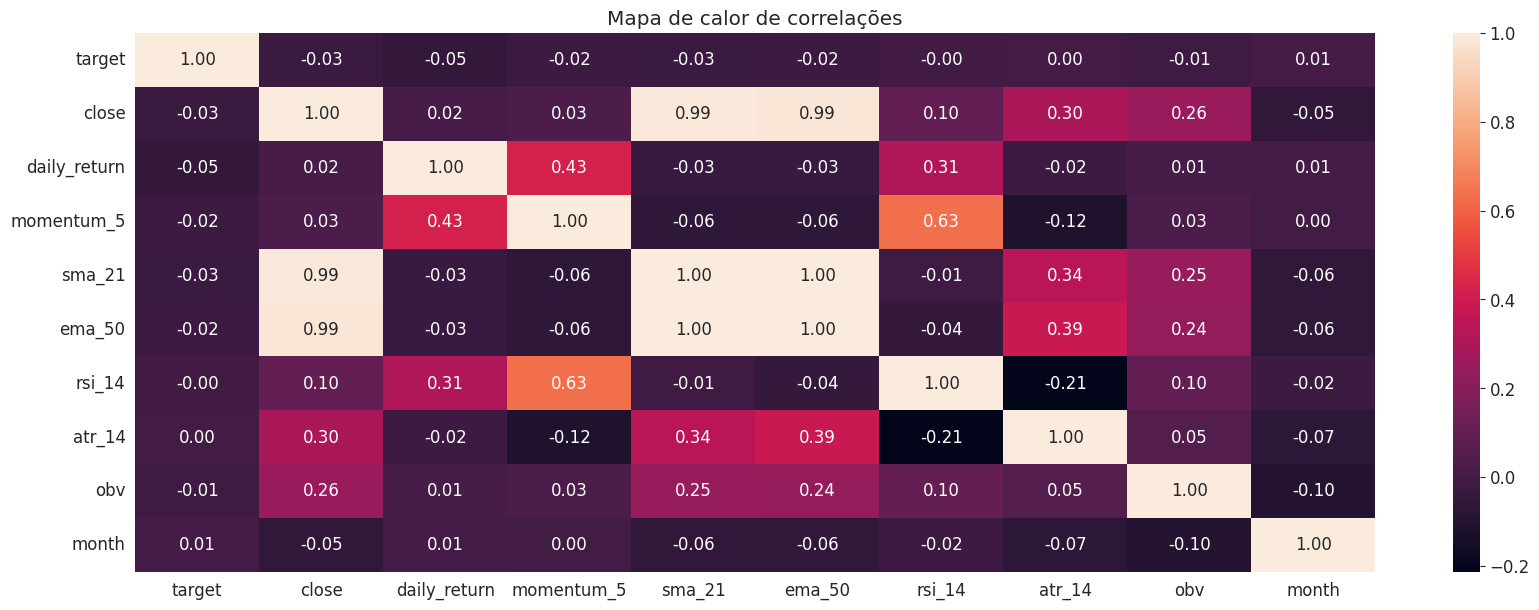

In [42]:
# mapa de calor de correlação das variáveis
columns_corr = ['target', 'close', 'daily_return', 'momentum_5', 'sma_21', 'ema_50', 'rsi_14', 'atr_14', 'obv', 'month']
corr = df[columns_corr].corr(numeric_only=True)

sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Mapa de calor de correlações')
plt.show()

As colunas de fechamento, SMA e EMA têm uma correlação muito alta. Para evitar multicolinariedade no modelo, vamos usar apenas uma dessas features no treinamento.